# Mutual Info Score


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Datasets/breast_cancer.csv", header=None)
data.columns = [
    "age",
    "menopause",
    "tumor-size",
    "inv-nodes",
    "node-caps",
    "deg-malig",
    "breast",
    "breaast-quad",
    "irradiat",
    "class",
]
data.dropna(axis=0, inplace=True)

In [3]:
y = data["class"]
X = data.drop("class", axis=1)
# X = data.iloc[:,:9]

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(y.reshape(-1, 1))
y = encoder.transform(y.reshape(-1, 1))

In [6]:
encoder.fit(X)
X = encoder.transform(X)

We want to compute $MIC$. In the case where $X$ is categorical and $Y$ is numerical, is:
$$ MIC(X,Y) = \int \int p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) dx dy $$

When both $X$ and $Y$ are categorichal, with $X$ having $k$ classess and $Y$ having $h$ classess it is:

\begin{align}
MIC(X,Y) &= \sum*{y \in Y} \sum*{x \in X} p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) \\
& = p(x = x_1,y = y_1) \log(\frac{p(x=x_1,y=y_1)}{p(x=x_1)p(y=y_1)}) + \cdots + p(x = x_k,y = y_1) \log(\frac{p(x=x_k,y=y_1)}{p(x=x_k)p(y=y_1)}) \ + \\
& \vdots \\
& + p(x = x_1,y = y_h) \log(\frac{p(x=x_1,y=y_h)}{p(x=x_1)p(y=y_h)}) + \cdots + p(x = x_k,y = y_h) \log(\frac{p(x=x_k,y=y_h)}{p(x=x_k)p(y=y_h)}) = \\
\end{align}

and: $$p(x = x_i , y = y_j) = p(x = x_i | y = y_j) p(y = y_j)  = \frac{\#x_i}{|y_j|}  \frac{\#y_j}{|Y|}$$.
So:
$$ MIC(X,Y) = \sum*{y \in Y} \sum*{x \in X} p(x|y)p(y) \log(\frac{p(x|y)p(y)}{p(x)p(y)}) $$


In [7]:
def MIC(x, y):
    x_levels = np.unique(x)
    y_levels = np.unique(y)
    # count how many elements per each level for each i={1,...,k} and j={1,...,h}
    x_count = np.array([np.count_nonzero(x == i) for i in x_levels])
    y_count = np.array([np.count_nonzero(y == i) for i in y_levels])

    mic = 0
    for i in range(len(y_levels)):
        for j in range(len(x_levels)):
            joint = (
                (np.count_nonzero((y == i) & (x == j)) / x_count[j])
                * x_count[j]
                / len(x)
            )
            if joint == 0:
                continue
            else:
                mic += joint * np.log(
                    joint / (x_count[j] / len(x) * y_count[i] / len(y))
                )
    return mic

In [8]:
def MIC_specular(x, y):
    x_levels = np.unique(x)
    y_levels = np.unique(y)
    # count how many elements per each level for each i={1,...,k} and j={1,...,h}
    x_count = np.array([np.count_nonzero(x == i) for i in x_levels])
    y_count = np.array([np.count_nonzero(y == i) for i in y_levels])

    mic = 0
    for i in range(len(y_levels)):
        for j in range(len(x_levels)):
            joint = (
                (np.count_nonzero((y == i) & (x == j)) / y_count[i])
                * y_count[i]
                / len(y)
            )
            if joint == 0:
                continue
            else:
                mic += joint * np.log(
                    joint / (x_count[j] / len(x) * y_count[i] / len(y))
                )
    return mic

In [9]:
for i in range(X.shape[1]):
    print(f"MIC between {i} covriate and target: ", MIC(X[:, i], y.ravel()))

MIC between 0 covriate and target:  0.01436812519181932
MIC between 1 covriate and target:  0.008006352932226554
MIC between 2 covriate and target:  0.04259861458170641
MIC between 3 covriate and target:  0.05712993478195178
MIC between 4 covriate and target:  0.038734513190465024
MIC between 5 covriate and target:  0.06136629232725527
MIC between 6 covriate and target:  0.0008544651540266287
MIC between 7 covriate and target:  0.005989752805088627
MIC between 8 covriate and target:  0.0240547232042084


In [10]:
for i in range(X.shape[1]):
    print(f"MIC between {i} covriate and target: ", MIC_specular(X[:, i], y.ravel()))

MIC between 0 covriate and target:  0.01436812519181932
MIC between 1 covriate and target:  0.008006352932226513
MIC between 2 covriate and target:  0.0425986145817064
MIC between 3 covriate and target:  0.05712993478195178
MIC between 4 covriate and target:  0.038734513190465024
MIC between 5 covriate and target:  0.0613662923272552
MIC between 6 covriate and target:  0.0008544651540266287
MIC between 7 covriate and target:  0.005989752805088627
MIC between 8 covriate and target:  0.024054723204208386


In [11]:
from sklearn.metrics import mutual_info_score

for i in range(X.shape[1]):
    print(
        f"MIC between {i} covriate and target: ", mutual_info_score(X[:, i], y.ravel())
    )

MIC between 0 covriate and target:  0.014368125191819573
MIC between 1 covriate and target:  0.008006352932227068
MIC between 2 covriate and target:  0.04259861458170642
MIC between 3 covriate and target:  0.05712993478195197
MIC between 4 covriate and target:  0.038734513190465614
MIC between 5 covriate and target:  0.06136629232725545
MIC between 6 covriate and target:  0.0008544651540267068
MIC between 7 covriate and target:  0.005989752805088747
MIC between 8 covriate and target:  0.024054723204209066


# k-Means


In [12]:
import math
import pandas as pd
import numpy as np
import os
import sys
from kmeans import MyKmeans

In [13]:
X = np.genfromtxt("../Datasets/s3.txt")
y = np.genfromtxt("../Datasets/s3.txt")

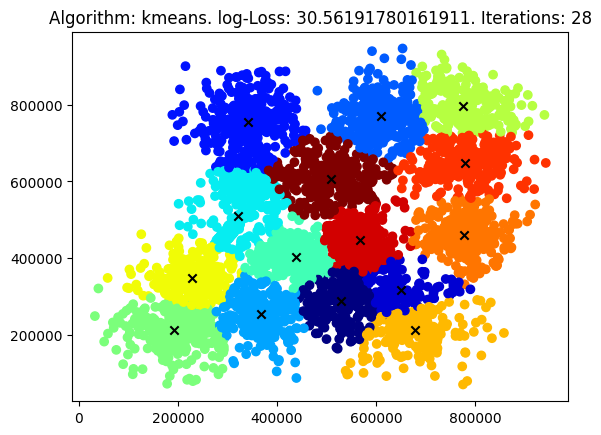

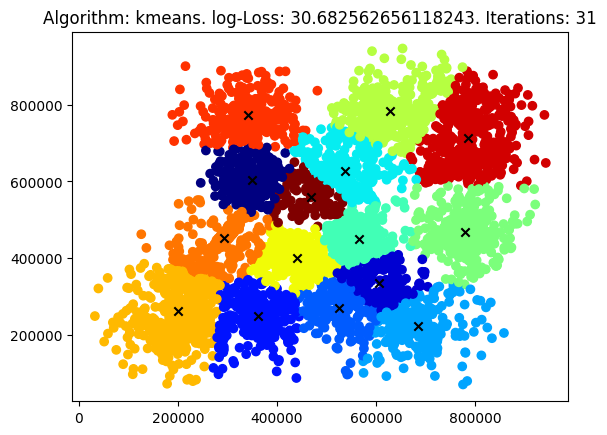

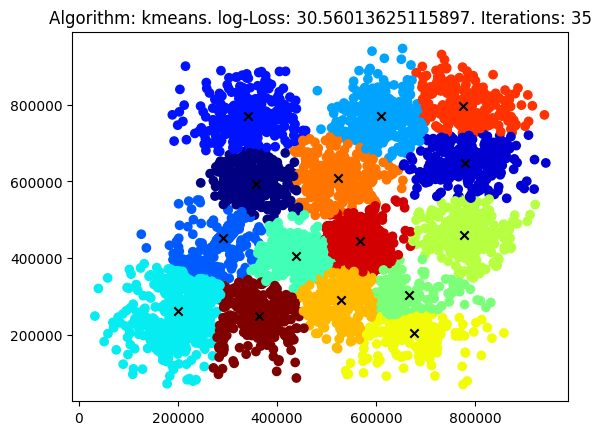

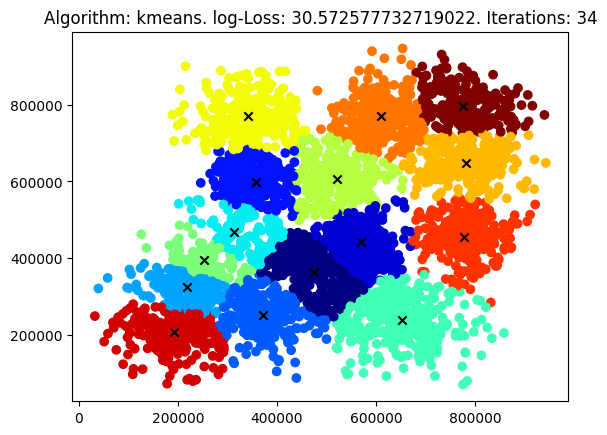

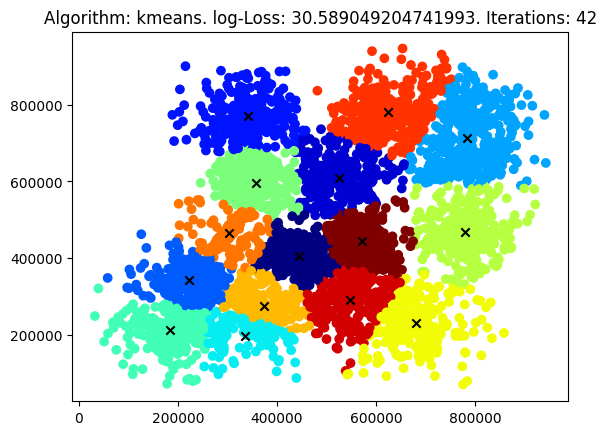

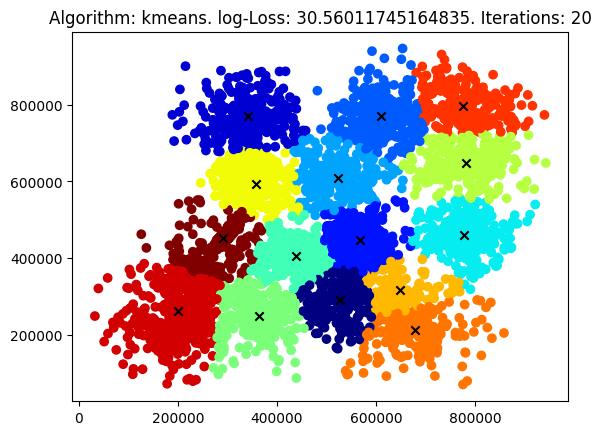

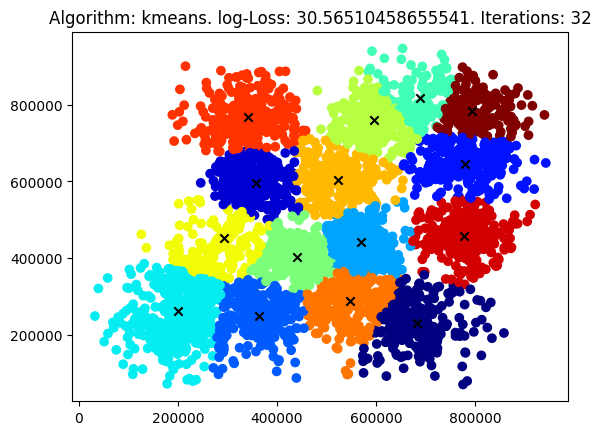

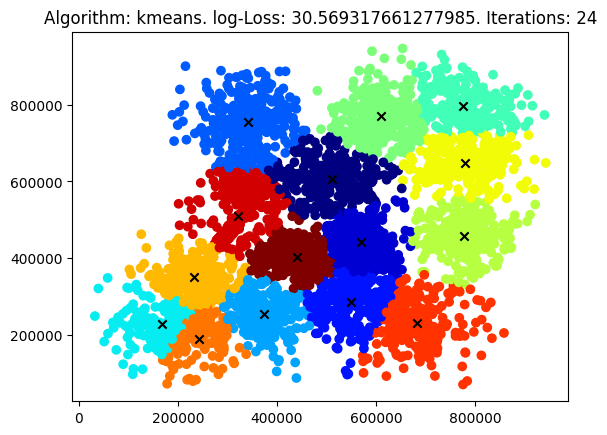

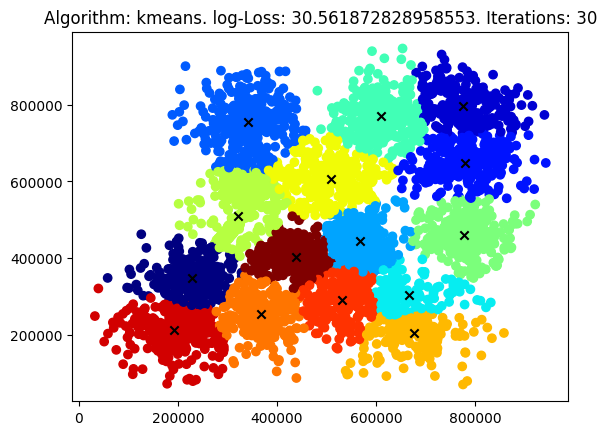

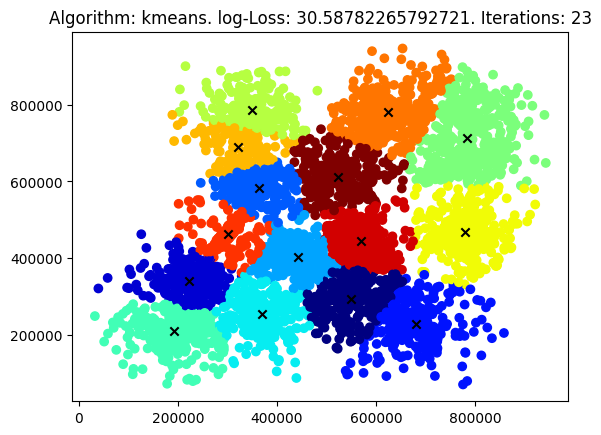

In [14]:
from matplotlib import pyplot as plt

kmeans = MyKmeans(k=15, algorithm_variant="kmeans")
cmap = plt.get_cmap("jet", kmeans.k)
for i in range(10):
    kmeans.fit(X, random_choice=i)
    kmeans.plot(X)
    kmeans.set_to_zero()

In [15]:
kmeans = MyKmeans(k=15, algorithm_variant="kmeans")
kmeans.fit(X, random_choice=4)
kmeans.loss

19259955363912.855

In [16]:
# funny interactive plot to show the evolution of the algorithm
kmeans = MyKmeans(k=15, algorithm_variant="kmeans")
kmeans.fit(X, random_choice=4)
kmeans.plot_history(X)

interactive(children=(IntSlider(value=0, description='i', max=42), Output()), _dom_classes=('widget-interact',…

In [17]:
# funny interactive plot to show the evolution of the algorithm
kmeanspp = MyKmeans(k=15, algorithm_variant="kmeans++")
kmeanspp.fit(X, random_choice=4)
kmeanspp.plot_history(X)

interactive(children=(IntSlider(value=0, description='i', max=19), Output()), _dom_classes=('widget-interact',…

In [18]:
# create a GIF
kmeans.create_gif(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


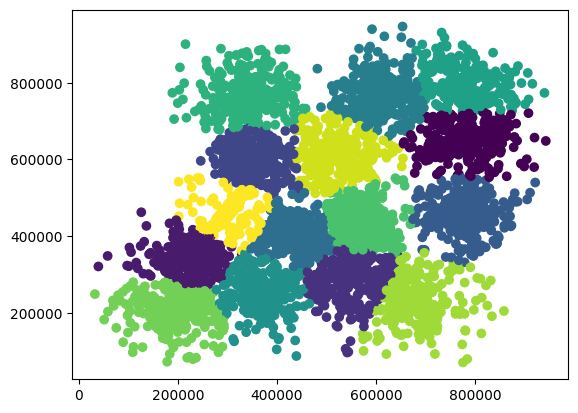

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=15,
)
kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)